In [19]:
import numpy as np
from numpy import shape, matrix, log, exp, zeros,random,dot,multiply
from mnist import readWithoutBias
from math import sqrt

In [2]:
data_train, label_train = readWithoutBias(dataset="training")
data_test, label_test = readWithoutBias(dataset="testing")
label_train = matrix(label_train)
label_test  = matrix(label_test)
data_train  = matrix(data_train).T
data_test   = matrix(data_test).T

In [20]:
train_mean  = data_train.mean(axis=1)
train_std   = data_train.std(axis=1)
data_train  = np.nan_to_num((data_train - train_mean)/train_std)
data_test   = np.nan_to_num((data_test - train_mean)/train_std)

/Users/apoorve/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()
/Users/apoorve/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/Users/apoorve/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


In [21]:
X_test = data_test
y_test = label_test

train = zip(data_train.T,label_train)
mini_batch_size = 10

n_input = shape(data_train)[0] # excluding bias term
n_hidden = 100               # excluding bias term
n_output = 10
epochs = 10
alpha = 0.001
mini_batch_size = 10

##Initializations

In [22]:
random.seed(0)
theta1 = matrix(random.randn(n_hidden,n_input))/sqrt(n_input)
bias1  = matrix(random.randn(n_hidden,1))
theta2 = matrix(random.randn(n_output,n_hidden))/sqrt(n_hidden)
bias2  = matrix(random.randn(n_output,1))

afunc, afuncGradient = act_funcs["leaky_relu"]

#Regularization term
lam = 0.01

#Momentum Term
gamma = 0.0
v1 = np.zeros_like(theta1)
vb1= np.zeros_like(bias1)
v2 = np.zeros_like(theta2)
vb2= np.zeros_like(bias2)

### Training Code

In [23]:
print "Layers:\t\t\t", 3
print "Hidden Nodes:\t\t",n_hidden
print "Epochs:\t\t\t", epochs
print "LearningRate:\t\t",alpha
print "Mini Batch Size:\t",mini_batch_size
print "Activation Fn:\t\tsigmoid"
print "Gamma(Momentum):\t",gamma
print "Lambda(Regularize):\t",lam

for i in range(epochs):
    random.shuffle(train)
    mini_batches = [train[k:k+mini_batch_size] for k in xrange(0,len(train),mini_batch_size)]
    for mini_batch in mini_batches:
        d1  = np.zeros_like(theta1)
        d2  = np.zeros_like(theta2)
        db1 = np.zeros_like(bias1)
        db2 = np.zeros_like(bias2)
        
        for X,y in mini_batch:
            gradTheta1, gradBias1, gradTheta2, gradBias2 = \
                backPropGradient(X.T, y, theta1, theta2, bias1, bias2) #just one example passed
            d1  += gradTheta1
            db1 += gradBias1
            d2  += gradTheta2
            db2 += gradBias2
            
        d1   = d1/mini_batch_size + lam*theta1
        db1  = db1/mini_batch_size
        d2   = d2/mini_batch_size + lam*theta2
        db2  = db2/mini_batch_size
        
        v1 = alpha*d1  + v1*gamma
        vb1= alpha*db1 + vb1*gamma
        v2 = alpha*d2  + v2*gamma
        vb2= alpha*db2 + vb2*gamma
        
        theta1 = theta1 - v1
        bias1  = bias1  - vb1
        theta2 = theta2 - v2
        bias2  = bias2  - vb2
    print "Epoch",i+1,"train,test accuracy:\t",accuracy(data_train, label_train, theta1, theta2, bias1, bias2), \
            accuracy(data_test, label_test , theta1, theta2, bias1, bias2)

Layers:			3
Hidden Nodes:		100
Epochs:			10
LearningRate:		0.001
Mini Batch Size:	10
Activation Fn:		sigmoid
Gamma(Momentum):	0.0
Lambda(Regularize):	0.01
Epoch 1 train,test accuracy:	0.888633333333 0.8923
Epoch 2 train,test accuracy:	0.90835 0.9108
Epoch 3 train,test accuracy:	0.9181 0.9193
Epoch 4 train,test accuracy:	0.924666666667 0.9218
Epoch 5 train,test accuracy:	0.928966666667 0.9268
Epoch 6 train,test accuracy:	0.93245 0.9291
Epoch 7 train,test accuracy:	0.935116666667 0.9329
Epoch 8 train,test accuracy:	0.937533333333 0.9346
Epoch 9 train,test accuracy:	0.939366666667 0.936
Epoch 10 train,test accuracy:	0.941183333333 0.9376


/Users/apoorve/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


### Checking backpropgradient vs numerical gradient

In [ ]:
X, y = train[0]
X = X.T
gradTheta1, gradBias1, gradTheta2, gradBias2 = backPropGradient(X,y,theta1,theta2, bias1, bias2)
numGrad1,numGradBias1,numGrad2,numGradBias2  = numericalGradient(X,y,theta1,theta2, bias1, bias2)
print np.sum(np.subtract(numGradBias2,gradBias2))
print np.sum(np.subtract(numGradBias1,gradBias1))
print np.sum(np.subtract(numGrad2,gradTheta2))
print np.sum(np.subtract(numGrad1,gradTheta1))

### Helper Functions

In [5]:
def accuracy(X, y, theta1, theta2, bias1, bias2):
    a1 = X
    z2 = dot(theta1,a1) + bias1
    a2 = afunc(z2)
    z3 = dot(theta2,a2) + bias2
    a3 = sigmoid(z3)
    
    pred = np.argmax(a3,axis=0)
    return np.sum(np.equal(pred,y.T))/float(len(y))

In [6]:
def backPropGradient(X, y, theta1, theta2, bias1, bias2):
    a1 = X
    z2 = dot(theta1,a1) + bias1
    a2 = afunc(z2)
    z3 = dot(theta2,a2) + bias2
    a3 = sigmoid(z3)
    
    t = np.zeros_like(a3)
    for i in range(len(y)):
        t[y[i],i] = 1
    
    delta3 = a3-t #shape (10,1)
    delta2 = dot(theta2.T,delta3)#shape (100,10)X(10,1) = (100,1)
    delta2 = multiply(delta2,afuncGradient(z2))

    gradTheta2 = dot(delta3,a2.T)
    gradBias2  = delta3
    gradTheta1 = dot(delta2,a1.T)
    gradBias1  = delta2
    return gradTheta1, gradBias1, gradTheta2, gradBias2

In [7]:
def errorFn(X, y, theta1, theta2, bias1, bias2):
    n_examples = shape(X)[1]
    a1 = X
    z2 = dot(theta1,a1) + bias1
    a2 = afunc(z2)
    z3 = dot(theta2,a2) + bias2
    a3 = sigmoid(z3)
    
    t = np.zeros_like(a3)
    for i in range(len(y)):
        t[y[i],i] = 1

    error = np.sum(multiply(t,log(a3)) + multiply((1-t),log(1-a3)))
    error = -error/n_examples
    return error

In [8]:
def numericalGradient(X, y, theta1, theta2, bias1, bias2):
    epsilon = 10**-5
    numGrad1     = np.zeros_like(theta1)
    numGradBias1 = np.zeros_like(bias1)
    numGrad2     = np.zeros_like(theta2)
    numGradBias2 = np.zeros_like(bias2)
    
    for i in range(shape(theta1)[0]):
        for j in range(shape(theta1)[1]):
            theta1_pos = np.copy(theta1)
            theta1_neg = np.copy(theta1)
            theta1_pos[i,j] += epsilon
            theta1_neg[i,j] -= epsilon
            numGrad1[i,j]    = (errorFn(X, y, theta1_pos, theta2, bias1, bias2) - \
                                errorFn(X, y, theta1_neg, theta2, bias1, bias2))/2/epsilon
    for i in range(shape(theta2)[0]):
        for j in range(shape(theta2)[1]):
            theta2_pos = np.copy(theta2)
            theta2_neg = np.copy(theta2)
            theta2_pos[i,j] += epsilon
            theta2_neg[i,j] -= epsilon
            numGrad2[i,j]    = (errorFn(X, y, theta1, theta2_pos, bias1, bias2) - \
                                errorFn(X, y, theta1, theta2_neg, bias1, bias2))/2/epsilon
    for i in range(shape(bias1)[0]):
        for j in range(shape(bias1)[1]):
            bias1_pos         = np.copy(bias1)
            bias1_neg         = np.copy(bias1)
            bias1_pos[i,j]   += epsilon
            bias1_neg[i,j]   -= epsilon
            numGradBias1[i,j] = (errorFn(X, y, theta1, theta2, bias1_pos, bias2) - \
                                errorFn(X, y, theta1, theta2, bias1_neg, bias2))/2/epsilon
    for i in range(shape(bias2)[0]):
        for j in range(shape(bias2)[1]):
            bias2_pos         = np.copy(bias2)
            bias2_neg         = np.copy(bias2)
            bias2_pos[i,j]   += epsilon
            bias2_neg[i,j]   -= epsilon
            numGradBias2[i,j] = (errorFn(X, y, theta1, theta2, bias1, bias2_pos) - \
                                errorFn(X, y, theta1, theta2, bias1, bias2_neg))/2/epsilon
    return numGrad1,numGradBias1,numGrad2,numGradBias2

In [9]:
sigmoid = lambda z: 1.0/(1.0+np.exp(-z))
sigmoid_prime = lambda z: multiply(sigmoid(z),(1-sigmoid(z)))
ftanh = lambda z: np.tanh(z)
ftanh_prime = lambda z: 1 - multiply(ftanh(z),ftanh(z))
funny_tanh = lambda z: 1.7159 * np.tanh(2.0/3.0 * z) + .001*z
funny_tanh_prime = lambda z: 1.7159 * 2.0 / 3.0 * (1.0 / multiply(np.cosh(2.0/3.0 * z),np.cosh(2.0/3.0 * z))) + .001
relu = lambda z: multiply(z,(z > 0))
relu_prime = lambda z: z >= 0
leaky_relu = lambda z: np.maximum(.1*z, z)
leaky_relu_prime = lambda z: 1*(z>=0) + .1*(z<0)

act_funcs = {'sigmoid': (sigmoid, sigmoid_prime),
             'ftanh': (ftanh, ftanh_prime),
             'funny_tanh': (funny_tanh, funny_tanh_prime),
             'relu': (relu,relu_prime),
             'leaky_relu': (leaky_relu,leaky_relu_prime)}

In [36]:
import numpy as np
import matplotlib.pyplot as plt

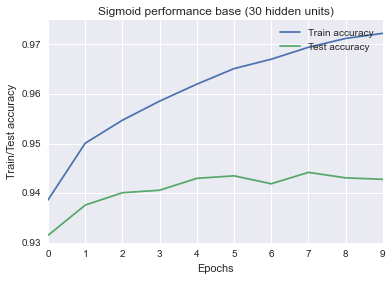

In [57]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.93865', '0.950083333333', '0.954716666667', '0.958566666667', '0.961983333333', '0.965116666667', '0.967016666667', '0.969416666667', '0.9712', '0.972233333333']
sigmoid_test = ['0.9315', '0.9376', '0.9401', '0.9406', '0.943', '0.9435', '0.9419', '0.9442', '0.9431', '0.9428']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance base (30 hidden units)")
sns.plt.legend()

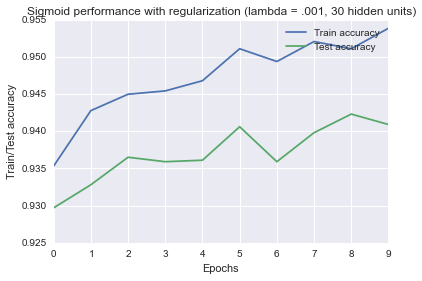

In [63]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.935316666667', '0.942766666667', '0.944966666667', '0.945416666667', '0.946783333333', '0.951083333333', '0.949366666667', '0.95205', '0.951083333333', '0.953833333333']
sigmoid_test = ['0.9297', '0.9328', '0.9365', '0.9359', '0.9361', '0.9406', '0.9359', '0.9398', '0.9423', '0.9409']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with regularization (lambda = .001, 30 hidden units)")
sns.plt.legend()

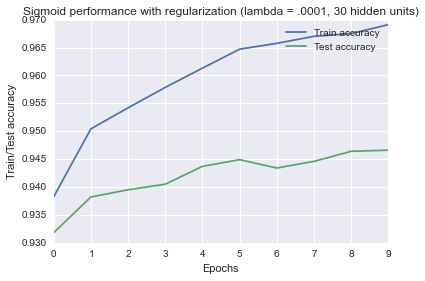

In [65]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.938233333333', '0.950416666667', '0.954183333333', '0.95785', '0.9613', '0.9647', '0.96575', '0.967', '0.9675', '0.9691']
sigmoid_test = ['0.9318', '0.9382', '0.9395', '0.9405', '0.9437', '0.9449', '0.9434', '0.9446', '0.9464', '0.9466']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with regularization (lambda = .0001, 30 hidden units)")
sns.plt.legend()

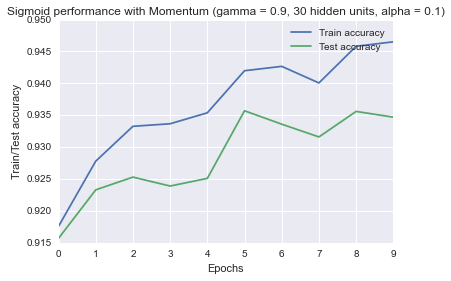

In [69]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.917583333333', '0.9278', '0.933266666667', '0.933666666667', '0.935383333333', '0.941983333333', '0.942666666667', '0.940066666667', '0.945816666667', '0.946516666667']
sigmoid_test = ['0.9157', '0.9233', '0.9253', '0.9239', '0.9251', '0.9357', '0.9336', '0.9316', '0.9356', '0.9347']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with Momentum (gamma = 0.9, 30 hidden units, alpha = 0.1)")
sns.plt.legend()

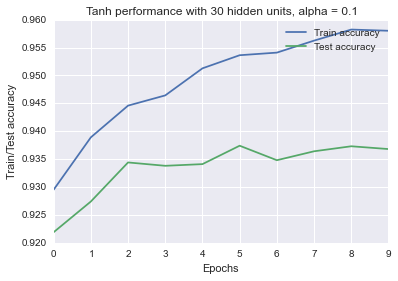

In [81]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.929516666667', '0.9389', '0.944583333333', '0.946416666667', '0.951266666667', '0.953616666667', '0.954083333333', '0.956233333333', '0.958216666667', '0.958']
sigmoid_test = ['0.9219', '0.9274', '0.9344', '0.9338', '0.9341', '0.9374', '0.9348', '0.9364', '0.9373', '0.9368']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Tanh performance with 30 hidden units, alpha = 0.1")
sns.plt.legend()

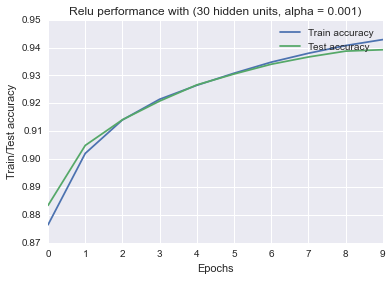

In [93]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.87645', '0.902033333333', '0.91405', '0.92145', '0.92645', '0.930783333333', '0.93475', '0.937933333333', '0.9407', '0.942833333333']
sigmoid_test = ['0.8834', '0.9049', '0.9141', '0.9208', '0.9266', '0.9305', '0.934', '0.9366', '0.9387', '0.9392']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Relu performance with (30 hidden units, alpha = 0.001)")
sns.plt.legend()

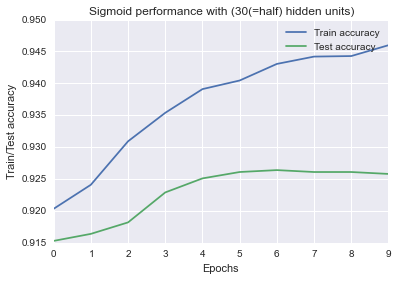

In [94]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.920333333333', '0.9241', '0.930916666667', '0.935383333333', '0.9391', '0.94045', '0.94305', '0.9442', '0.944283333333', '0.945983333333']
sigmoid_test = ['0.9153', '0.9164', '0.9182', '0.9229', '0.9251', '0.9261', '0.9264', '0.9261', '0.9261', '0.9258']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with (30(=half) hidden units)")
sns.plt.legend()

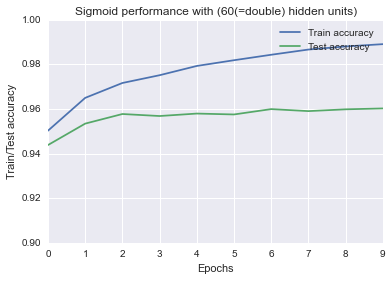

In [91]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.950233333333', '0.964933333333', '0.9716', '0.975083333333', '0.979233333333', '0.9818', '0.98425', '0.986583333333', '0.987966666667', '0.989']
sigmoid_test = ['0.9438', '0.9534', '0.9577', '0.9568', '0.9579', '0.9575', '0.9599', '0.959', '0.9598', '0.9602']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with (60(=double) hidden units)")
sns.plt.legend()

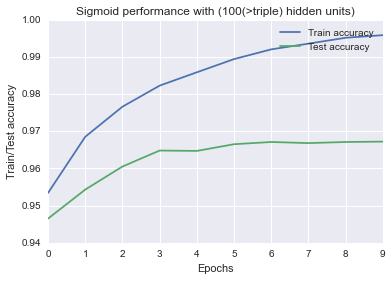

In [92]:
x = [i for i in xrange(10)]
        
sigmoid_train = ['0.9534', '0.9685', '0.976583333333', '0.98225', '0.985833333333', '0.989383333333', '0.992', '0.993533333333', '0.995116666667', '0.995816666667']
sigmoid_test = ['0.9465', '0.9543', '0.9605', '0.9648', '0.9647', '0.9665', '0.9671', '0.9668', '0.9671', '0.9672']

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with (100(>triple) hidden units)")
sns.plt.legend()

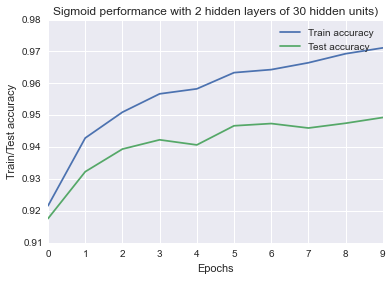

In [101]:
x = [i for i in xrange(10)]
        
sigmoid_train = [0.9216166666666666, 0.9428666666666666, 0.9509666666666666, 0.9567166666666667, 0.9582833333333334, 0.9633666666666667, 0.9643166666666667, 0.9664666666666668, 0.9693, 0.9711333333333333]
sigmoid_test = [0.9175999999999999, 0.9323, 0.9394, 0.9423, 0.9407, 0.9467, 0.9474000000000001, 0.946, 0.9475, 0.9493]

sns.plt.xlabel("Epochs")
sns.plt.ylabel("Train/Test accuracy")
sns.plt.plot(x, sigmoid_train,  label = "Train accuracy" )
sns.plt.plot(x, sigmoid_test,  label = "Test accuracy" )
sns.plt.title("Sigmoid performance with 2 hidden layers of 30 hidden units)")
sns.plt.legend()